start recording
Time Left: 3 seconds
Time Left: 2 seconds
Time Left: 1 seconds
Time Left: 0 seconds


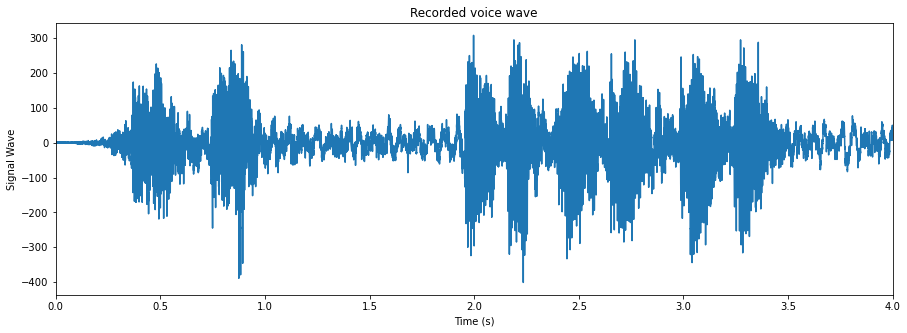

In [1]:
import pyaudio
import wave
import matplotlib.pyplot as plt
import numpy as np

FRAMES_PER_BUFFER = 3200
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000

pa = pyaudio.PyAudio()

stream = pa.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    frames_per_buffer=FRAMES_PER_BUFFER
)

print('start recording')

seconds = 4
frames = []
second_tracking = 0
second_count = 0
for i in range(0, int(RATE/FRAMES_PER_BUFFER*seconds)):
    data = stream.read(FRAMES_PER_BUFFER)
    frames.append(data)
    second_tracking += 1
    if second_tracking == RATE/FRAMES_PER_BUFFER:
        second_count += 1
        second_tracking = 0
        print(f'Time Left: {seconds - second_count} seconds')


stream.stop_stream()
stream.close()
pa.terminate()

obj = wave.open('voicedata.wav', 'wb')
obj.setnchannels(CHANNELS)
obj.setsampwidth(pa.get_sample_size(FORMAT))
obj.setframerate(RATE)
obj.writeframes(b''.join(frames))
obj.close()


file = wave.open('voicedata.wav', 'rb')

sample_freq = file.getframerate()
frames = file.getnframes()
signal_wave = file.readframes(-1)

file.close()

time = frames / sample_freq


# if one channel use int16, if 2 use int32
audio_array = np.frombuffer(signal_wave, dtype=np.int16)

times = np.linspace(0, time, num=frames)

plt.figure(figsize=(15, 5))
plt.plot(times, audio_array)
plt.ylabel('Signal Wave')
plt.xlabel('Time (s)')
plt.xlim(0, time)
plt.title('Recorded voice wave')
plt.show()